<a href="https://colab.research.google.com/github/varamba/Ya_practicum_projects/blob/main/games_rate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сборный проект

## Начальные данные

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Импортируем все основные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings 
warnings.filterwarnings("ignore")

Выведем информацию о дате

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на пропуски

In [5]:
df.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [6]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Сразу видим неправильные типы данных:

Год выпуска и оценка критиков - должны быть целыми числами.

Так же имеются пропуски в колонках:

Оценка критиков - 51% пропусков;

Оценка пользователей и рейтинг - 40% пропусков;

Год выпуска - 1.6% пропусков;

Остальные пропуски очень малы и несущественны

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Никаких аномальных данных я не вижу, по крайней мере сейчас.

## Предобработка данных

Переименуем колонки, разберемся с пропусками, изменим типы данных, посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [8]:
df = df.rename(
 columns={
'Name' : 'name',
'Platform' : 'platform',
'Year_of_Release' : 'year',
'Genre' : 'genre',
'NA_sales' : 'na_sales',
'EU_sales' : 'eu_sales',
'JP_sales' : 'jp_sales',
'Other_sales' : 'other_sales',
'Critic_Score' : 'critic_score',
'User_Score' : 'user_score',
'Rating' : 'rating'}
)

In [9]:
#check
df

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#Проверка наличия дупликатов
df.duplicated().sum()

0

In [11]:
df.loc[df['name'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Наблюдаем 2 безымянные игры, у одной есть только год выпуска, другая имеет чуть больше данных, но они несущественны - можно спокойно удалить.

In [12]:
df = df.dropna(subset=['name'])

In [13]:
df.loc[df['year'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].astype('Int64')

In [15]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['critic_score'] = df['critic_score'].astype('Int64')

Колонка user_score имеет тип object, хотя там нахоятся оценки, которые имеют тип float, это из-за значения tbd (to be determined) - общепринятое обозначение неуточненной информации, поэтому его стоит заменить на NaN и изменить тип.

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].astype('float64')

In [17]:
df['rating'] = df['rating'].fillna('No rate')

In [18]:
#check
df['rating'].unique()

array(['E', 'No rate', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [19]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16444 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   Int64  
 9   user_score    7590 non-null   float64
 10  rating        16713 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


Пропусков достаточно много, удалять их нельзя, а заменить нечем, поэтому оставлю, тк они особо не должны помешать анализу, тем более так сложится наиболее реальная картина данных.

Основные значения без пропусков - это количество проданных копий игры, они нам и нужны как целевые значения.

Посчитаем продажи по регионам:

In [20]:
df['total_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,No rate,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,No rate,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,No rate,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,No rate,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,No rate,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,No rate,0.01


**Вывод**

Данные в целом хорошие, есть пропуски, но не столь критичные и их не так много. Можно работать дальше.

## Исследовательский анализ

### Обзор

Посмотрим количество игр по годам

In [21]:
count_games = df.groupby('year')['name'].count()
count_games.sort_values()

year
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: name, dtype: int64

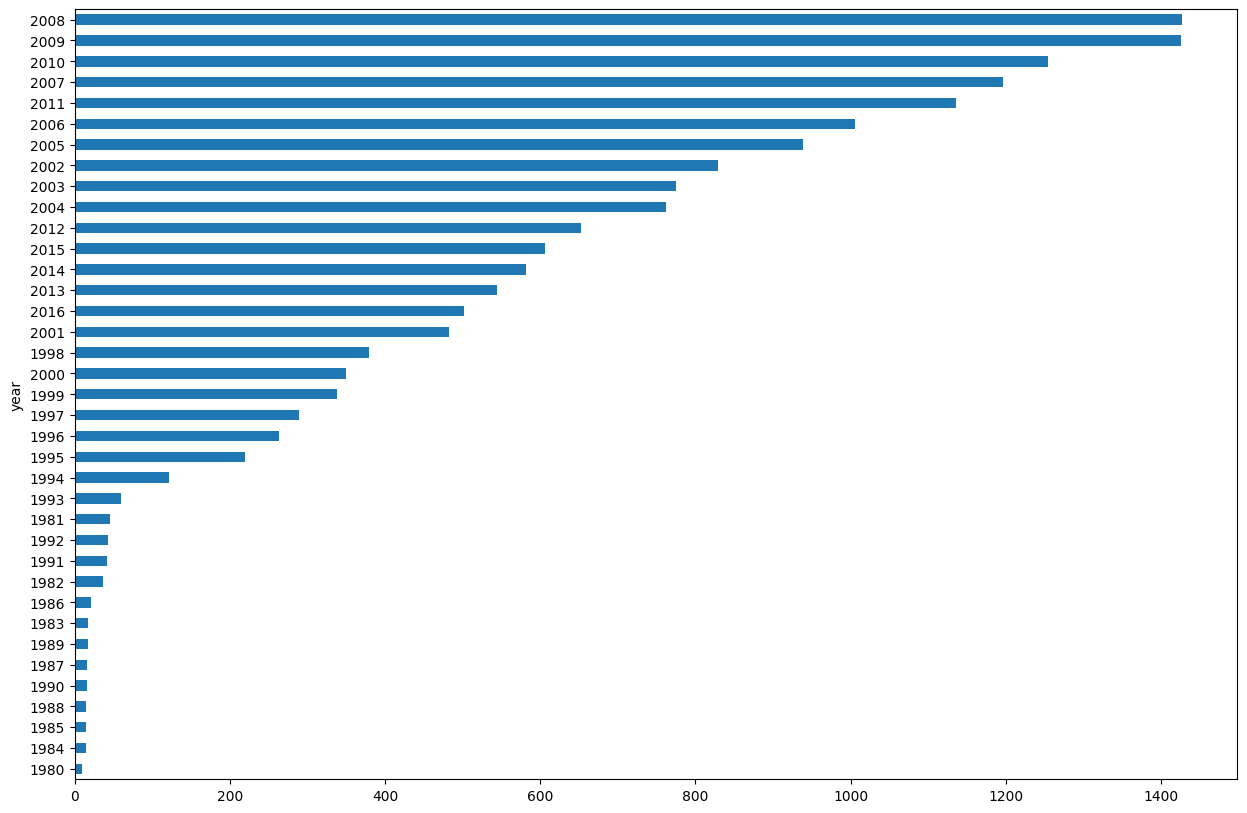

In [22]:
count_games.sort_values().plot(kind='barh', figsize=(15,10));

И по платформам.

In [23]:
count_games_pl = df.groupby(['platform', 'year'])['name'].count()
count_games_pl

platform  year
2600      1980     9
          1981    46
          1982    36
          1983    11
          1984     1
                  ..
XB        2008     1
XOne      2013    19
          2014    61
          2015    80
          2016    87
Name: name, Length: 238, dtype: int64

In [24]:
count_games_pl.sort_values().tail(20)

platform  year
PS2       2008    191
GBA       2002    198
PS        1999    200
DS        2006    201
X360      2011    206
PS2       2007    214
PS3       2011    215
PS        1998    248
Wii       2010    253
PS2       2003    256
          2006    259
          2004    259
          2005    260
          2002    280
Wii       2008    282
DS        2010    323
Wii       2009    325
DS        2007    376
          2009    403
          2008    492
Name: name, dtype: int64

### Разбивка по платформам

In [25]:
df_platform = df.pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum')
df_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


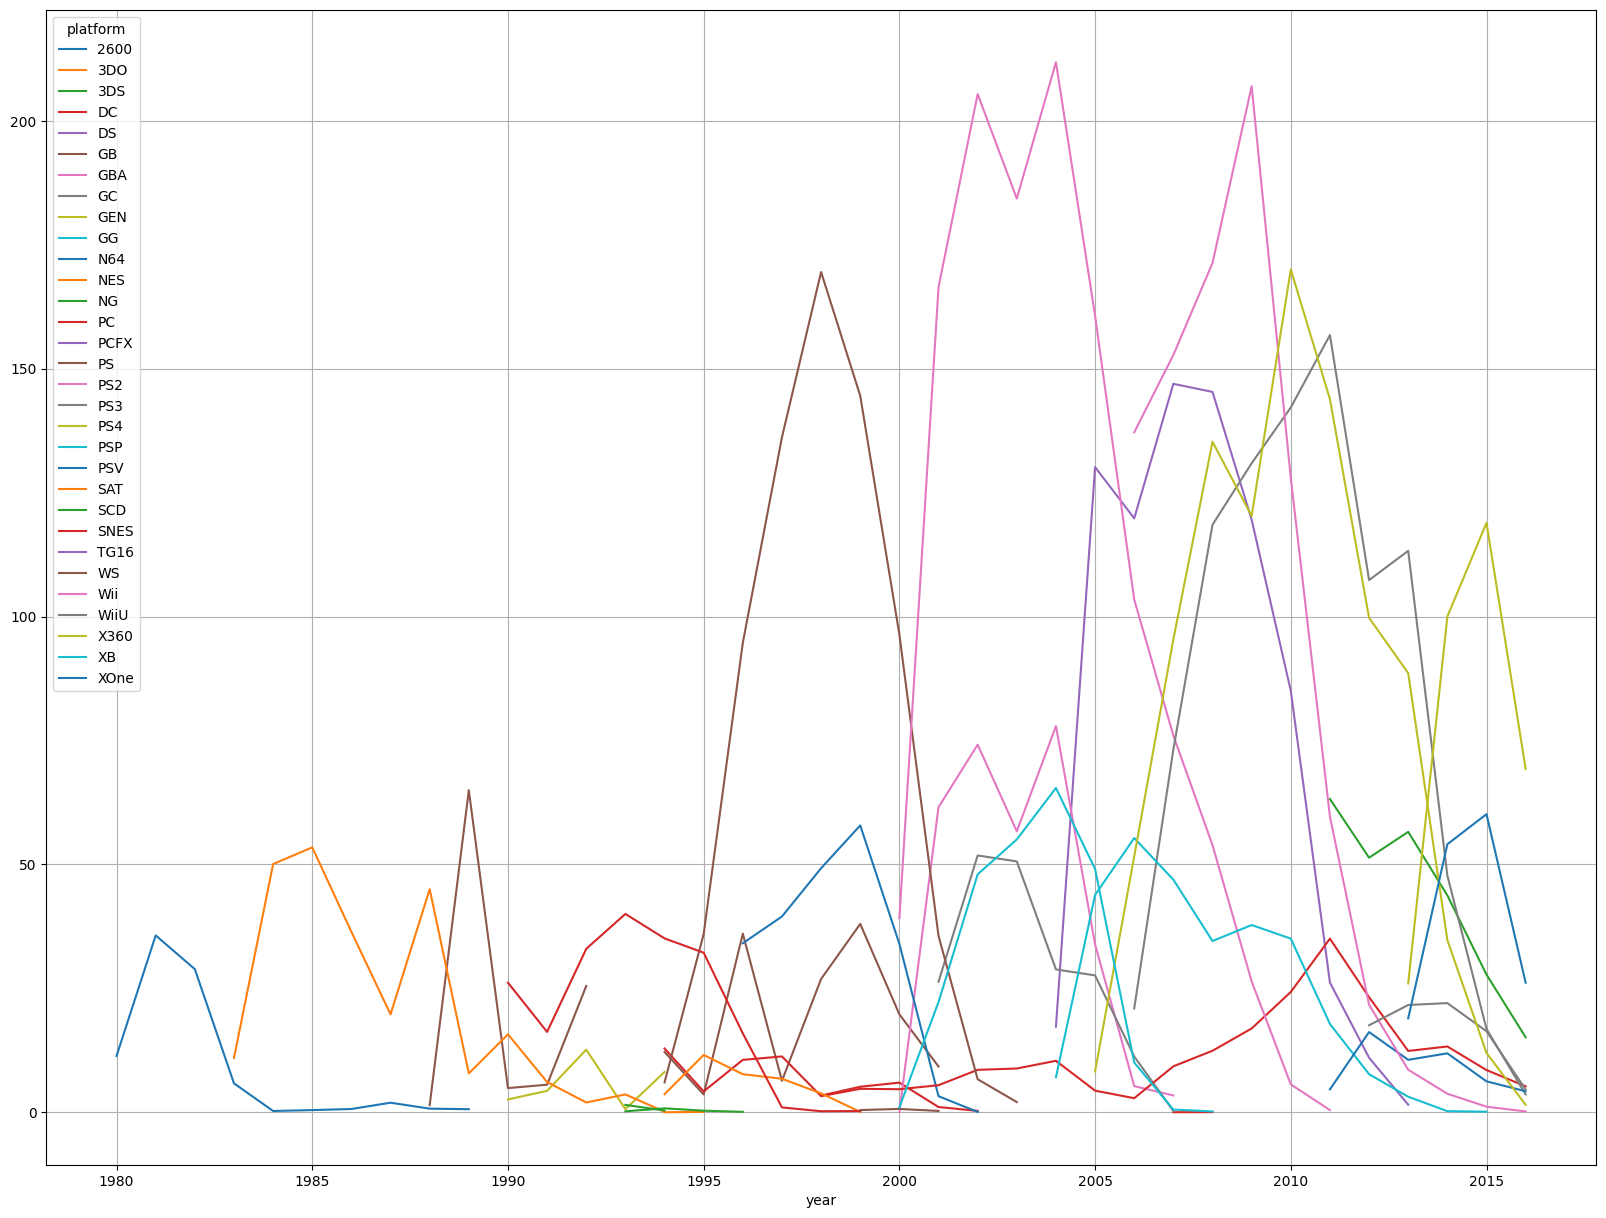

In [26]:
df_platform.plot( grid=True, figsize=(20, 15));

На графике видно, что новые платформы сменяют друг друга каждые 5-10 лет.

При появлении новой платформы выявляется быстрый рост продаж, потом, чаще всего, уход в 0.

Ближе к нашему времени появляется тенденция выпускать апгрейды наиболее популярных платформ (PS1-4, Xbox,360 и тд)

### Актуальный период

Мы хотим отследить динамику продаж для 2017 года, поэтому далееее будем анализировать последние 3 года, тем самым предполагая, что данные к 17 году будут изменяться в подобном ключе.

In [27]:
data = df.copy()
#оставим последние 2 года
cond1 = df['year'] >= 2014  
cond2 = df['year'] <= 2016
df = df[cond1 & cond2]

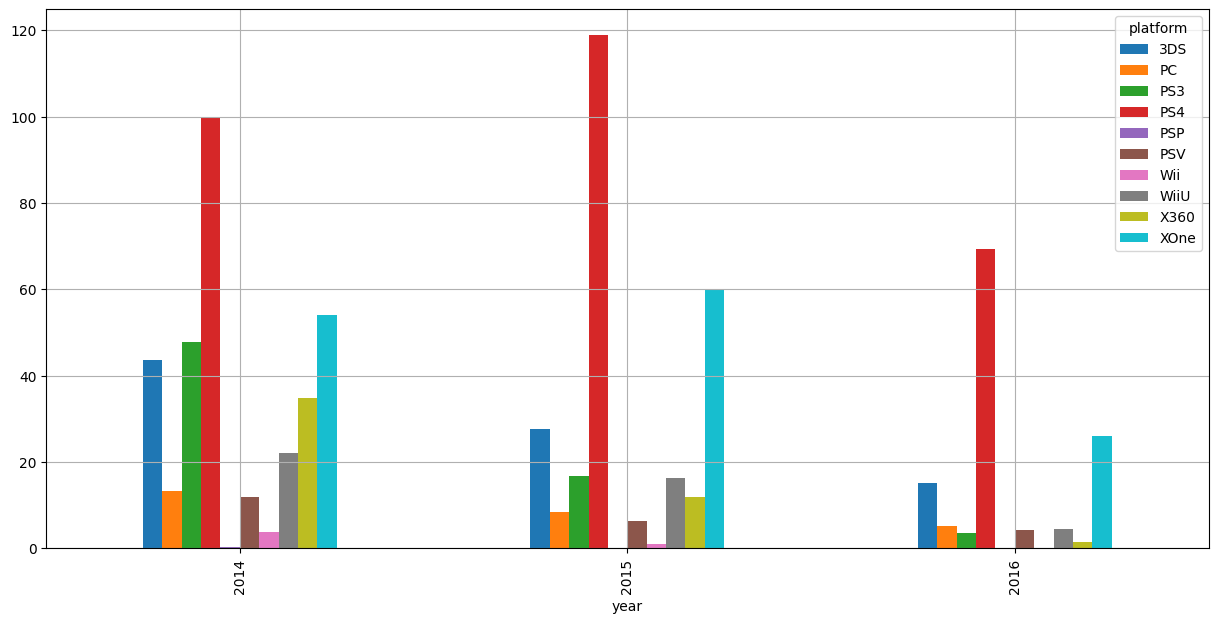

In [28]:
df.pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum').plot(kind = 'bar', grid=True, figsize=(15, 7))
plt.show()

На графике видно, что продажи по многим платформам упали в несколько раз, некоторые платформы вообще пропали.

Причина в смене поколения игровых платформ, или замена старой версии на новую(xBox360 - XOne, PS3 - PS4) либо просто платформа сильно устарела.

В лидерах остаются PS4 и Xbox One, несмотря на нехватку данных в 16 году.

Посомтрим детальнее

In [29]:
df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum().sort_values('total_sales', ascending = False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22
WiiU,19.36,13.15,7.31,3.16,42.98
PC,7.23,17.97,0.00,1.85,27.05
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07


### Лучшие платформы

Выделим наиболее выгодные платформы: PS4 и XOne.

Так же выделяется 3DS, но она продается в основном в Японии, а остальные по всему миру, поэтому оставим только 2 платформы.

In [30]:
df_top = df.query("platform == ['PS4', 'XOne','3DS']").reset_index()
df_top

,index,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,No rate,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,No rate,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,No rate,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,<NA>,NaN,No rate,0.01
812,16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,No rate,0.01
813,16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,<NA>,NaN,No rate,0.01
814,16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01


In [31]:
df_top.tail(30)

,index,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
786,16459,Fate/kaleid liner Prisma Illya,3DS,2014,Action,0.00,0.00,0.01,0.0,<NA>,NaN,No rate,0.01
787,16478,Cartoon Network Battle Crashers,3DS,2016,Action,0.01,0.00,0.00,0.0,<NA>,NaN,E10+,0.01
788,16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.0,42,2.3,E10+,0.01
789,16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,0.00,0.00,0.01,0.0,<NA>,NaN,No rate,0.01
790,16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.0,70,6.8,T,0.01
791,16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.0,69,7.5,No rate,0.01
792,16501,River City Ransom SP,3DS,2016,Action,0.00,0.00,0.01,0.0,<NA>,NaN,No rate,0.01
793,16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.0,<NA>,NaN,No rate,0.01
794,16508,Ride 2,XOne,2016,Racing,0.00,0.01,0.00,0.0,<NA>,8.2,E,0.01
795,16517,SoniPro,3DS,2014,Adventure,0.00,0.00,0.01,0.0,<NA>,NaN,No rate,0.01


К концу 2016 года продаж почти нет, что очень странно.

Либо нет данных, тк данные еще не обновлялись(считаем, что сейчас 2016 год), либо популярность платформ резко упала(что мало вероятно).

Посмотрим зависимость данных.

In [32]:
df_top.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


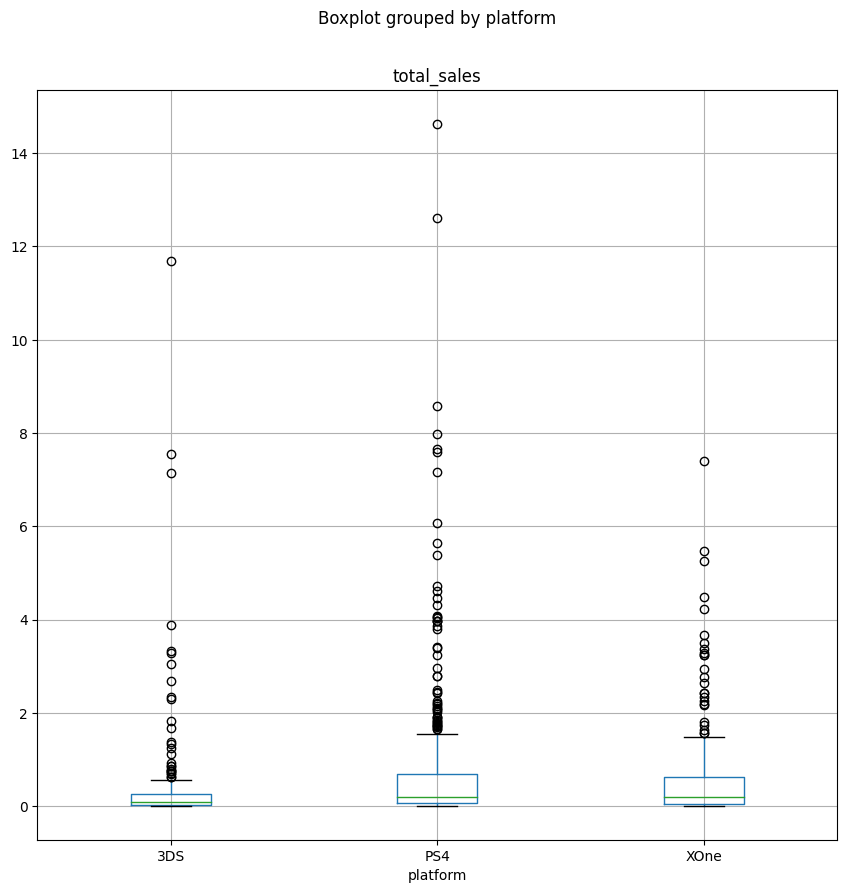

In [33]:
df_top.boxplot(column='total_sales', by='platform', figsize=(10, 10))
plt.show()

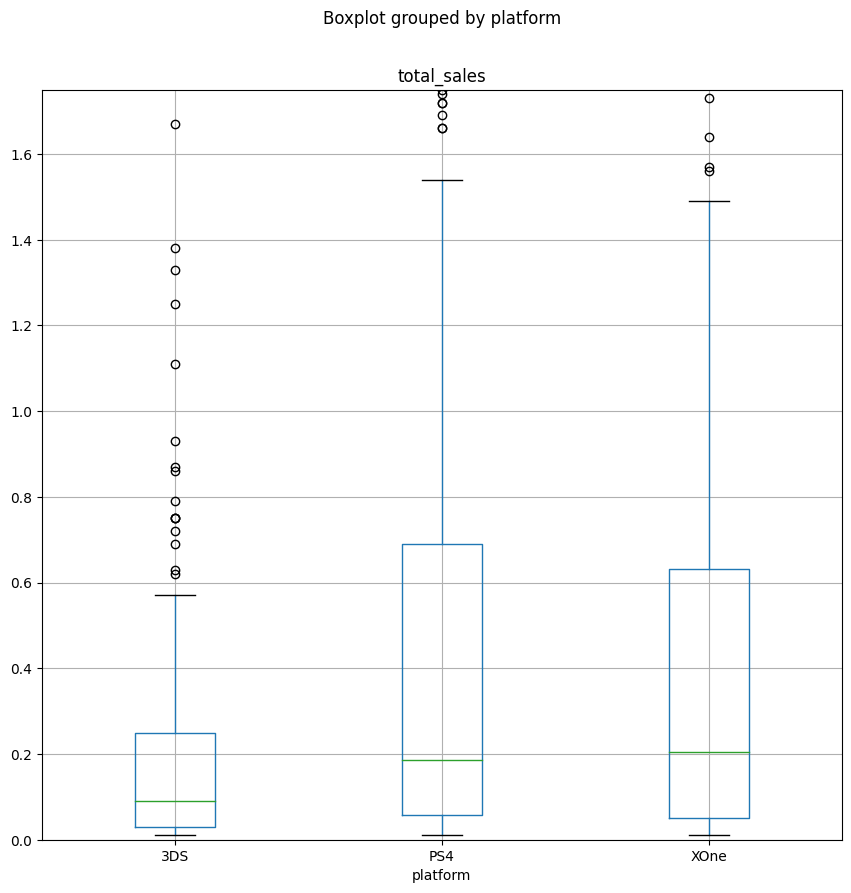

In [34]:
df_top.boxplot(column='total_sales', by='platform', figsize=(10, 10))
plt.ylim(0, 1.75)
plt.show()

Есть достаточно много "обычных" выбросов и несколько очень больших, скорее всего объясняется тем, что игра на релизе набрала огромную популярность, можно посмотреть что это за игры.

В целом почти одинаковые распределения для обеих платформ. Если не считать выбросы, я бы их приравнял между собой.
Медиана Xbox больше ps4, но sony чуть больше размазана в торону 75квантиля.

3DS немного отстает.

In [35]:
df_top.query('total_sales > 4')

,index,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,No rate,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,No rate,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,No rate,7.98
5,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
6,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
7,96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,<NA>,NaN,No rate,7.55
8,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,No rate,7.39
9,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Так и есть, в топе культовые игры. Не будем считать что это аномалии - так и должно быть, все оставляем как есть.

### Анализ отзывов

Далее посмотрим как соотносятся отзывы пользователей и критиков для платформы PS4 как самой прибыльной.

Text(0.5, 1.0, 'Диаграмма рассеяния — Оценка критиков')

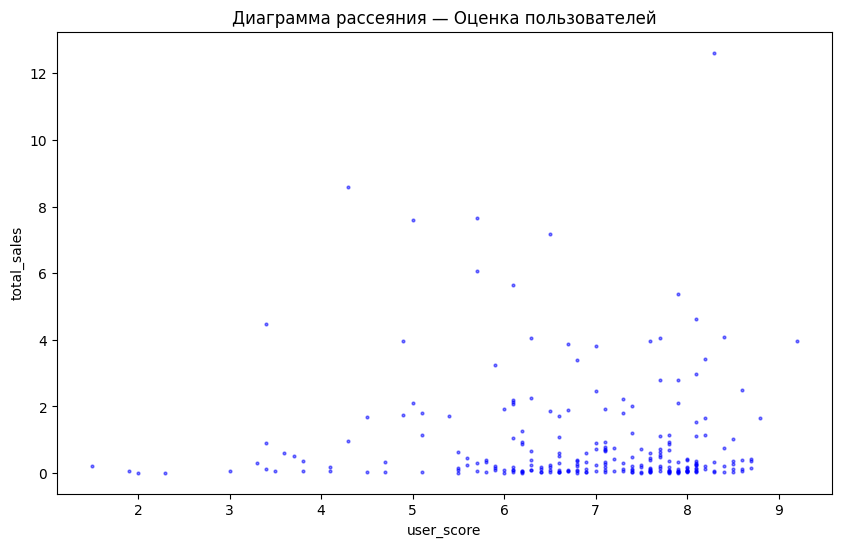

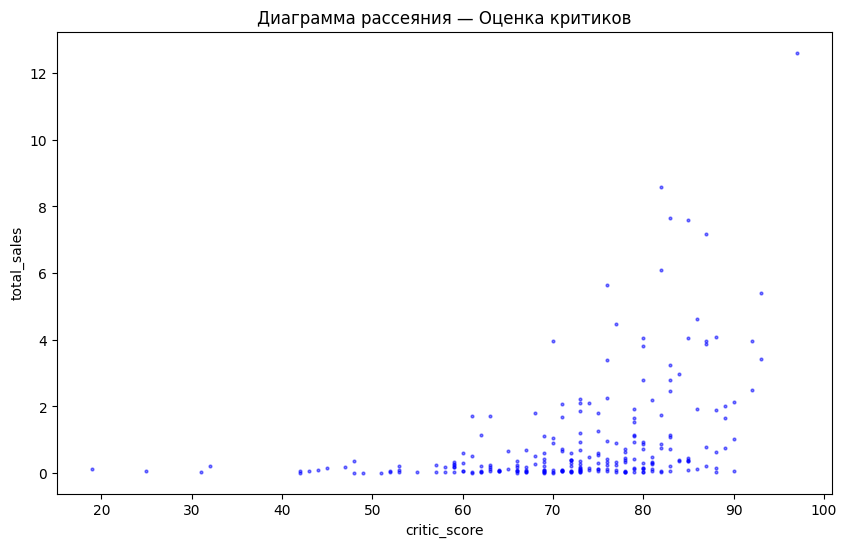

In [36]:
df_top[df_top['platform'] == 'PS4'].plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(10,6), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Оценка пользователей')


df_top[df_top['platform'] == 'PS4'].plot(kind='scatter',
        y='total_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(10,6), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Оценка критиков')

In [37]:
ps4 = df_top[df_top['platform']=='PS4']

In [38]:
ps4.describe()

,index,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,376.000000,376.0,376.000000,376.000000,376.000000,376.000000,237.0,242.000000,376.000000
mean,8045.797872,2015.236702,0.262261,0.345851,0.039947,0.118298,72.164557,6.828099,0.766356
std,5274.742697,0.762336,0.583439,0.815480,0.067048,0.256506,12.214985,1.399035,1.614969
min,31.000000,2014.0,0.000000,0.000000,0.000000,0.000000,19.0,1.500000,0.010000
25%,2969.000000,2015.0,0.000000,0.000000,0.000000,0.000000,66.0,6.200000,0.057500
50%,8015.000000,2015.0,0.050000,0.070000,0.015000,0.020000,73.0,7.100000,0.185000
75%,12918.500000,2016.0,0.240000,0.280000,0.050000,0.102500,80.0,7.875000,0.690000
max,16585.000000,2016.0,6.030000,6.310000,0.490000,2.380000,97.0,9.200000,14.630000


Посчитаем корреляцию

In [39]:
ps4.corr()

,index,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000000,0.356774,-0.561889,-0.534875,-0.388257,-0.580963,-0.466720,-0.032352,-0.581473
year,0.356774,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.044226,0.035502,-0.214338
na_sales,-0.561889,-0.219443,1.000000,0.784902,0.491452,0.944903,0.411638,-0.016156,0.928090
eu_sales,-0.534875,-0.195176,0.784902,1.000000,0.472101,0.944380,0.340268,-0.064199,0.958109
jp_sales,-0.388257,-0.040969,0.491452,0.472101,1.000000,0.510433,0.379041,0.179384,0.538524
other_sales,-0.580963,-0.219129,0.944903,0.944380,0.510433,1.000000,0.404645,-0.044166,0.998252
critic_score,-0.466720,-0.044226,0.411638,0.340268,0.379041,0.404645,1.000000,0.546434,0.402661
user_score,-0.032352,0.035502,-0.016156,-0.064199,0.179384,-0.044166,0.546434,1.000000,-0.040132
total_sales,-0.581473,-0.214338,0.928090,0.958109,0.538524,0.998252,0.402661,-0.040132,1.000000


Корреляция продаж от отзывов очень слабая: -0.059

Корреляция продаж от отзывов критиков средняя: 0.39

Какой-то сильной зависимости или закономерности не наблюдается. Единственное что можно сказать: оценки критиков и пользователей в основном положительные(больше 6/60).

Соотнесем продажи со всех платформ

In [40]:
top_platform = df.groupby('platform')['total_sales']
top_platform.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


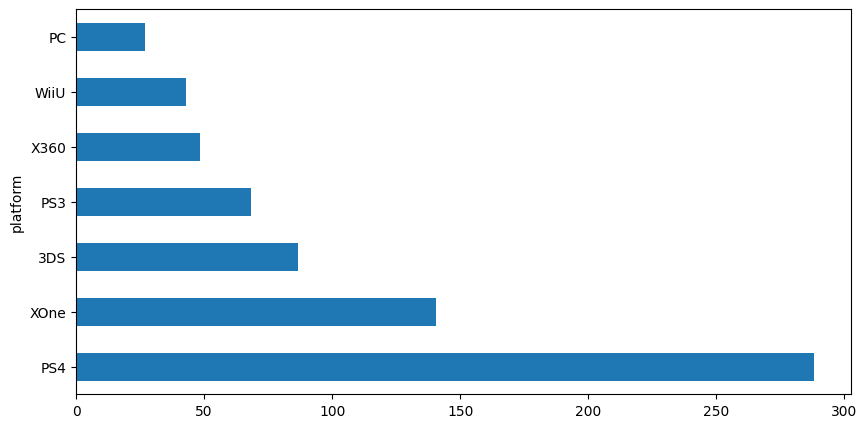

In [41]:
top_platform.sum().sort_values(ascending = False).head(7).plot(kind = 'barh', figsize=(10,5))
plt.show()

Видим, что после 2х самым продаваемых платформ идет Японская 3DS, а также прошлые версии топов: ps3 и xbox360, замыкает WiiU, которая тоже очень популярна в Японии, и PC, которые всегда был, есть и будет.

Детальнее рассмотрим XOne и 3DS.

Text(0.5, 1.0, 'Диаграмма рассеяния — Оценка критиков')

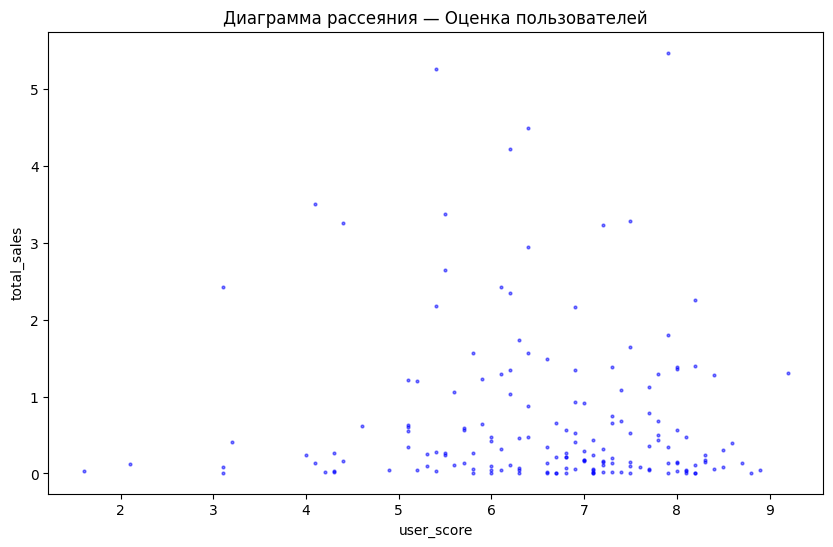

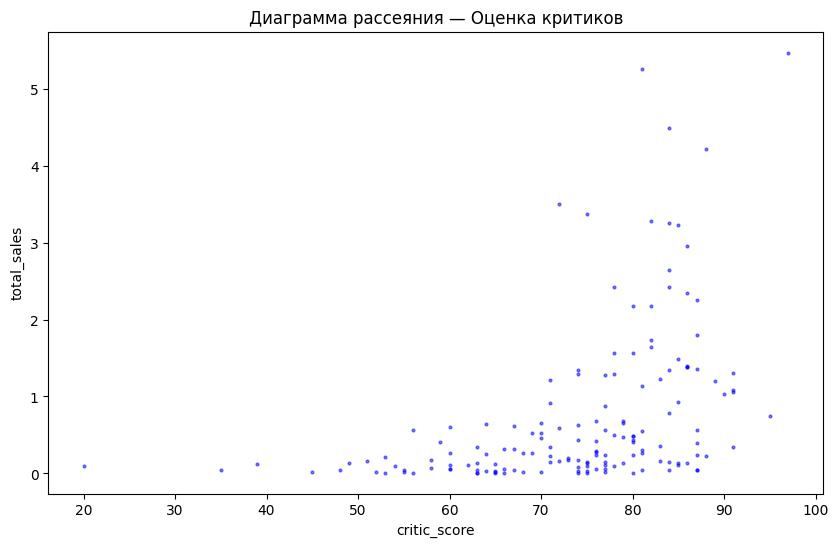

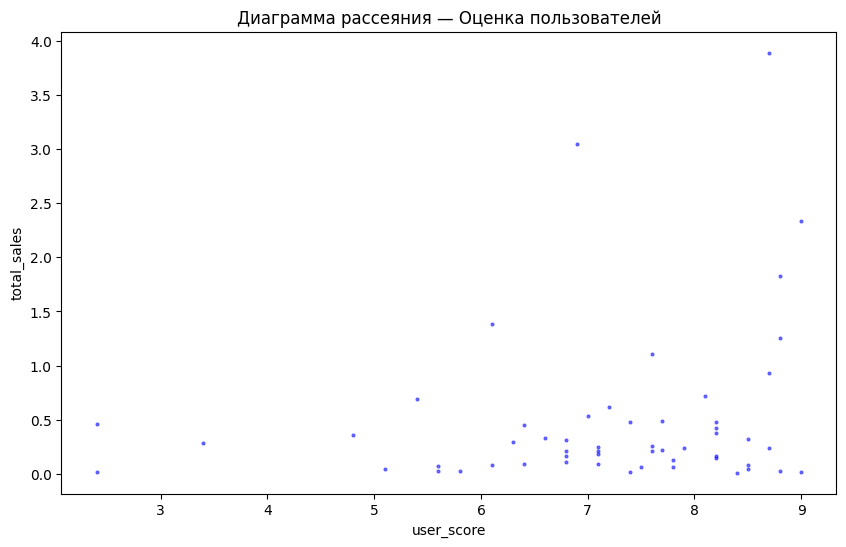

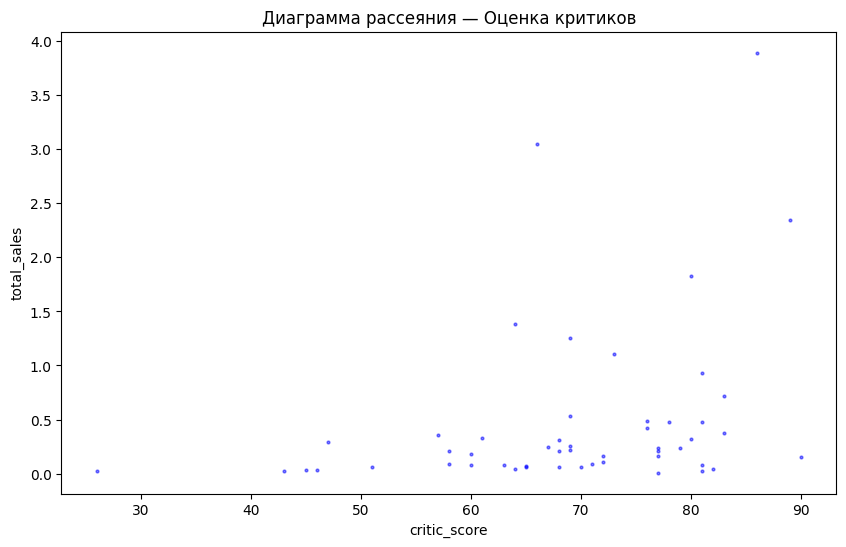

In [42]:
df_top[df_top['platform'] == 'XOne'].plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(10,6), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Оценка пользователей')


df_top[df_top['platform'] == 'XOne'].plot(kind='scatter',
        y='total_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(10,6), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Оценка критиков')

df_top[df_top['platform'] == '3DS'].plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(10,6), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Оценка пользователей')


df_top[df_top['platform'] == '3DS'].plot(kind='scatter',
        y='total_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(10,6), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Оценка критиков')

In [43]:
xbox = df_top[df_top['platform']=='XOne']
ds = df_top[df_top['platform']=='3DS']

In [44]:
xbox.corr()

,index,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000000,0.383407,-0.634770,-0.602548,-0.304551,-0.659940,-0.509385,0.025878,-0.660673
year,0.383407,1.000000,-0.225464,-0.204378,-0.173475,-0.231761,-0.012092,-0.033366,-0.231327
na_sales,-0.634770,-0.225464,1.000000,0.763032,0.435269,0.987812,0.401137,-0.068053,0.969688
eu_sales,-0.602548,-0.204378,0.763032,1.000000,0.424716,0.852089,0.385121,-0.061547,0.897802
jp_sales,-0.304551,-0.173475,0.435269,0.424716,1.000000,0.450555,0.207366,0.062259,0.460953
other_sales,-0.659940,-0.231761,0.987812,0.852089,0.450555,1.000000,0.425689,-0.069776,0.995134
critic_score,-0.509385,-0.012092,0.401137,0.385121,0.207366,0.425689,1.000000,0.440977,0.428677
user_score,0.025878,-0.033366,-0.068053,-0.061547,0.062259,-0.069776,0.440977,1.000000,-0.070384
total_sales,-0.660673,-0.231327,0.969688,0.897802,0.460953,0.995134,0.428677,-0.070384,1.000000


In [45]:
ds.corr()

,index,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
index,1.000000,0.058853,-0.415071,-0.426185,-0.592935,-0.423714,-0.431466,-0.134454,-0.549161
year,0.058853,1.000000,-0.064862,-0.080950,-0.065903,-0.069488,0.201100,0.235841,-0.077659
na_sales,-0.415071,-0.064862,1.000000,0.926126,0.598757,0.995141,0.363441,0.254592,0.926824
eu_sales,-0.426185,-0.080950,0.926126,1.000000,0.570443,0.957303,0.178086,0.014621,0.902940
jp_sales,-0.592935,-0.065903,0.598757,0.570443,1.000000,0.600666,0.279149,0.235903,0.844990
other_sales,-0.423714,-0.069488,0.995141,0.957303,0.600666,1.000000,0.330872,0.203967,0.933912
critic_score,-0.431466,0.201100,0.363441,0.178086,0.279149,0.330872,1.000000,0.862485,0.314117
user_score,-0.134454,0.235841,0.254592,0.014621,0.235903,0.203967,0.862485,1.000000,0.215193
total_sales,-0.549161,-0.077659,0.926824,0.902940,0.844990,0.933912,0.314117,0.215193,1.000000


По корреляциям снова не видно какой-то зависимости. Но в целом по графикам видно, что чем выше рейтинг пользователей, тем выше продажи игр, точнее тем чаще появляются выбросы, то есть очень хорошие игры оценивают лучше и покупают чаще.

### Разбивка по жанрам

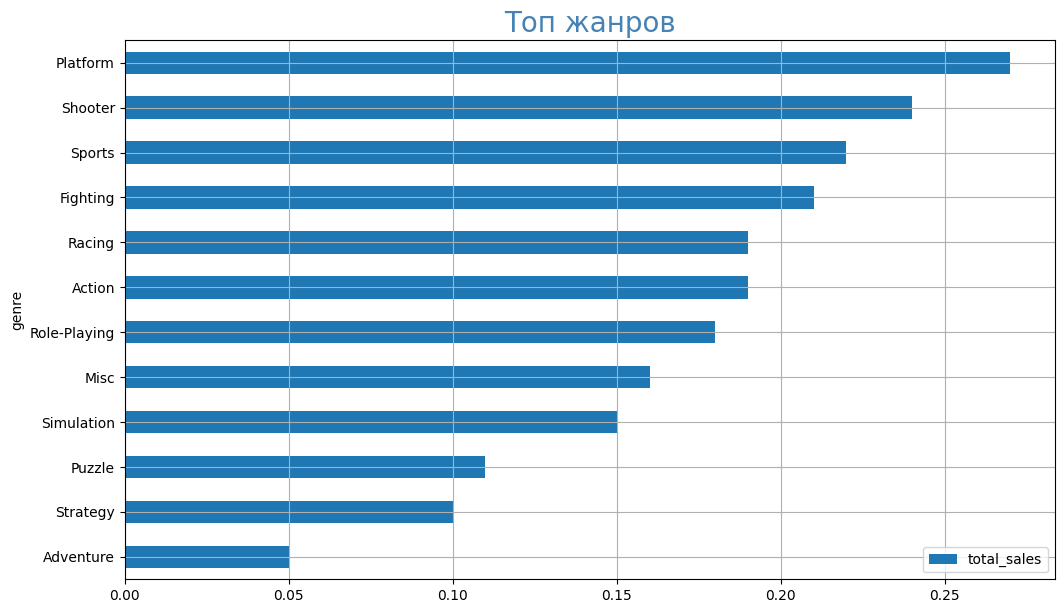

In [46]:
genre_pivot = data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by = 'total_sales')
genre_pivot.plot(kind = 'barh', grid=True, figsize=(12, 7)).set_title('Топ жанров', fontsize = 20, color = 'SteelBlue')
plt.show()

Топ любимых жанров:

1. Платформинг
2. Шутер
3. Спорт
4. Файтинг
5. Гонки/Экшн

Можно посмотреть на актуальные данные, за последние 2 года.

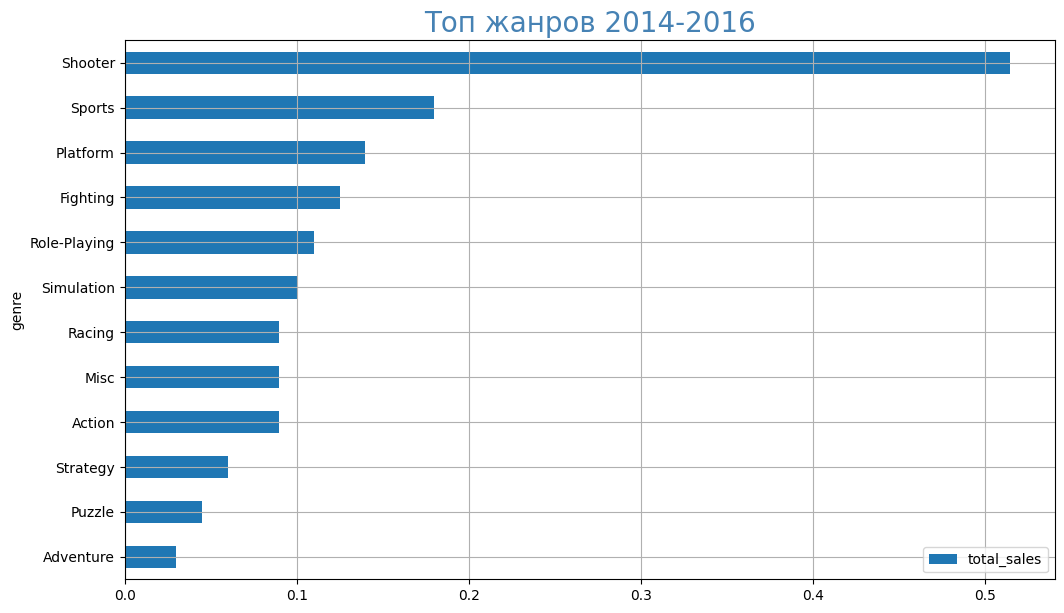

In [47]:
genre_pivot_actual = df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by = 'total_sales')
genre_pivot_actual.plot(kind = 'barh', grid=True, figsize=(12, 7)).set_title('Топ жанров 2014-2016', fontsize = 20, color = 'SteelBlue')
plt.show()

Картина иная, шутеры - любимый жанр в 14-16 годах, сильно опережая все остальные.

### Портрет пользователя.

#### Продажи по платформам

Соберем данные продаж по 3м регионам

In [48]:
user_pref = df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales'].sum()

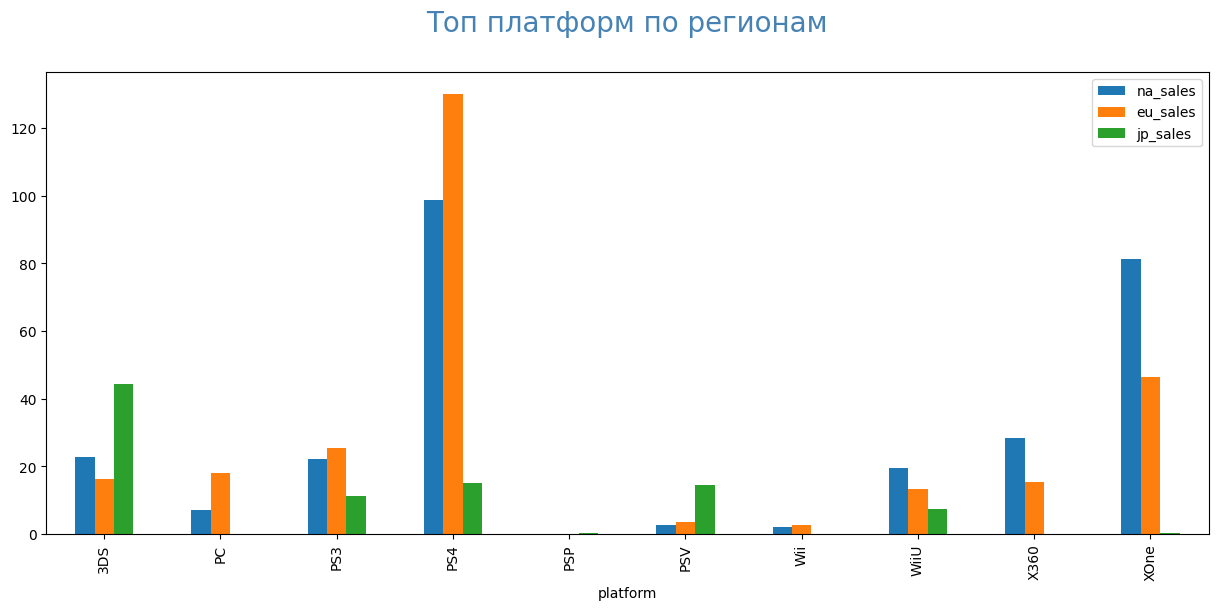

In [49]:
user_pref.plot(kind = 'bar', figsize=(15,6)).set_title('Топ платформ по регионам' + "\n", fontsize = 20, color = 'SteelBlue');

Мало что понятно, посмотрим по каждому региону отдельно

Топ платформ в Америке

In [50]:
na_pl = user_pref.sort_values(by = 'na_sales', ascending = False)
na_pl.head(5)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
X360,28.30,15.49,0.08
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22


In [51]:
eu_pl = user_pref.sort_values(by = 'eu_sales', ascending = False)
eu_pl.head(5)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
PS3,22.05,25.54,11.22
PC,7.23,17.97,0.00
3DS,22.64,16.12,44.24


In [52]:
jp_pl = user_pref.sort_values(by = 'jp_sales', ascending = False)
jp_pl.head(5)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PS4,98.61,130.04,15.02
PSV,2.52,3.53,14.54
PS3,22.05,25.54,11.22
WiiU,19.36,13.15,7.31


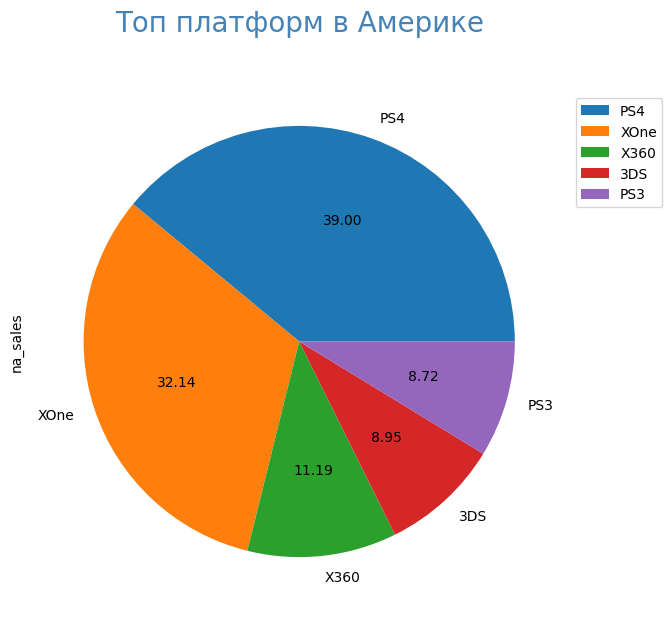

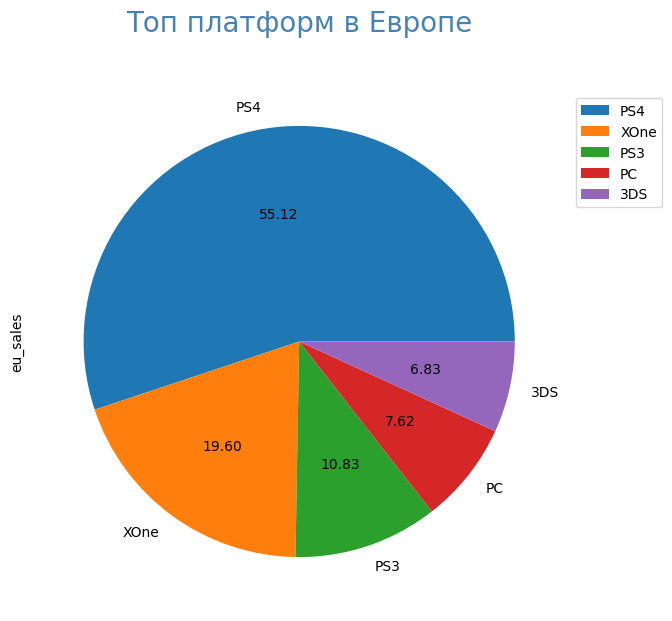

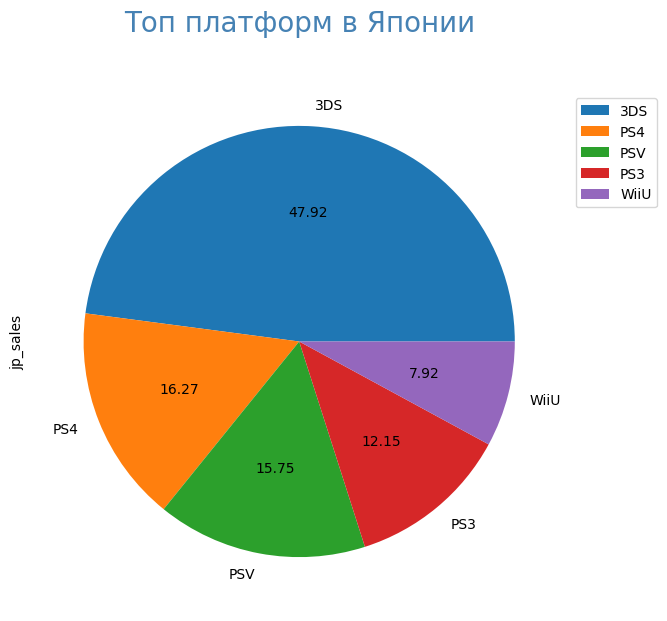

In [53]:
na_pl.head(5).plot.pie(y='na_sales', figsize=(7, 7), autopct="%.2f").set_title('Топ платформ в Америке' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85))

eu_pl.head(5).plot.pie(y='eu_sales', figsize=(7, 7), autopct="%.2f").set_title('Топ платформ в Европе' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

jp_pl.head(5).plot.pie(y='jp_sales', figsize=(7, 7), autopct="%.2f").set_title('Топ платформ в Японии' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

*Вывод по платформам.*

В Америке примерно поровну PS4 и XBox, в Европе сильно популярна sony, в Японии в топе серии Sony(3,4, Vita) и 3DS.

#### Продажи по жанрам

Далее рассмотрим топ жанров по регионам

In [54]:
genre_pref = df.groupby(['genre'])['na_sales', 'eu_sales', 'jp_sales'].sum()

In [55]:
genre_pref

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


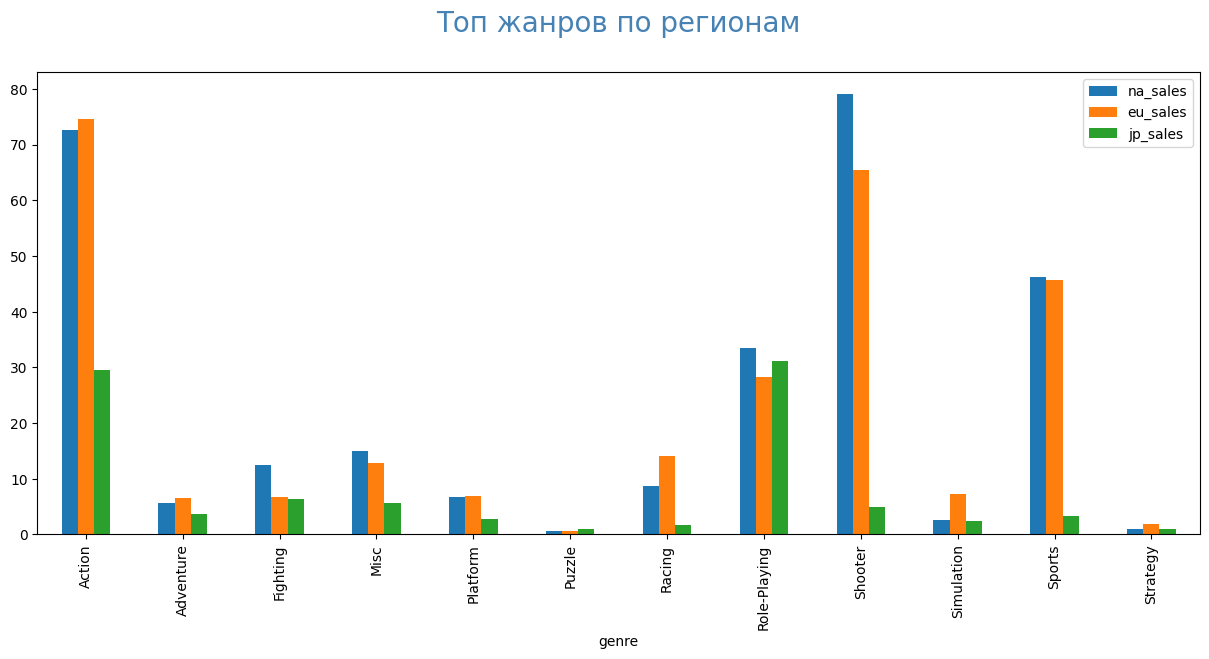

In [56]:
genre_pref.plot(kind = 'bar', figsize=(15,6)).set_title('Топ жанров по регионам' + "\n", fontsize = 20, color = 'SteelBlue');

Детальнее по регионам

In [57]:
na_gen = genre_pref.sort_values(by = 'na_sales', ascending = False)
na_gen.head(5)

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Misc,15.05,12.86,5.61


In [58]:
eu_gen = genre_pref.sort_values(by = 'eu_sales', ascending = False)
eu_gen.head(5)

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Shooter,79.02,65.52,4.87
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Racing,8.74,14.13,1.76


In [59]:
jp_gen = genre_pref.sort_values(by = 'jp_sales', ascending = False)
jp_gen.head(5)

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,33.47,28.17,31.16
Action,72.53,74.68,29.58
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Shooter,79.02,65.52,4.87


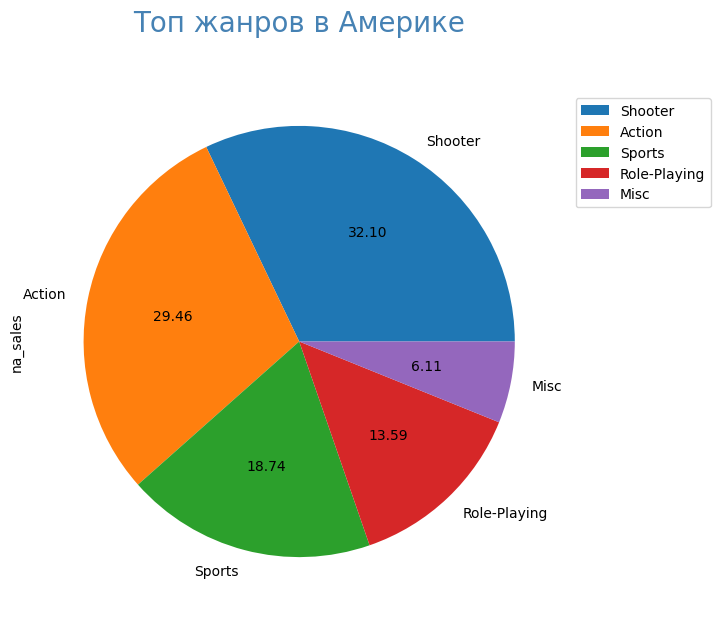

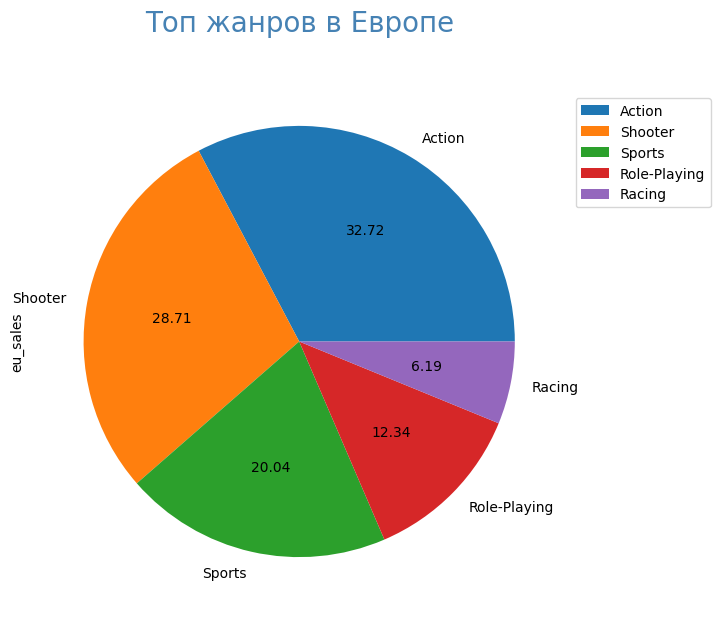

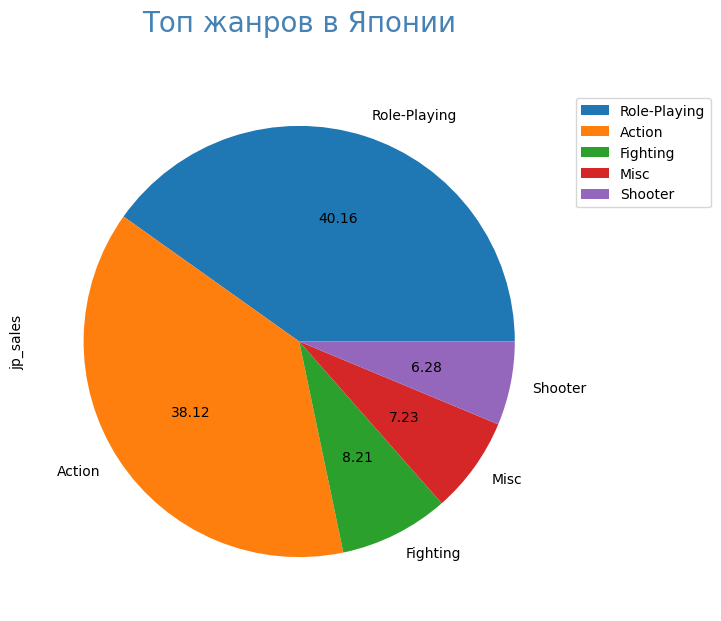

In [60]:
na_gen.head(5).plot.pie(y='na_sales', figsize=(7, 7), autopct="%.2f").set_title('Топ жанров в Америке' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

eu_gen.head(5).plot.pie(y='eu_sales', figsize=(7, 7), autopct="%.2f").set_title('Топ жанров в Европе' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

jp_gen.head(5).plot.pie(y='jp_sales', figsize=(7, 7), autopct="%.2f").set_title('Топ жанров в Японии' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

*Вывод по жанрам.*

В Америке и Европе предпочтения по жанрам очень схожи, в Японии преобладает жанр ролевых игр.

#### Продажи по рейтингу

In [61]:
data_rating = df.groupby(['rating'])['na_sales', 'eu_sales', 'jp_sales'].sum()
data_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
No rate,64.72,58.95,56.90
T,38.95,34.07,14.78


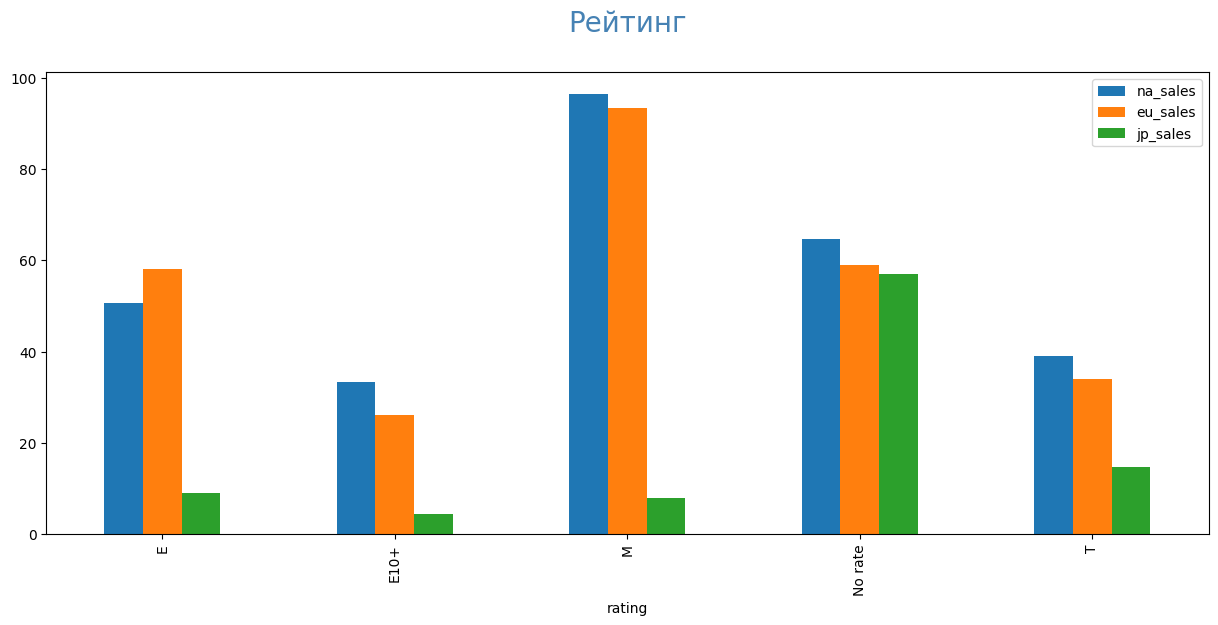

In [62]:
data_rating.plot(kind = 'bar', figsize=(15,6)).set_title('Рейтинг' + "\n", fontsize = 20, color = 'SteelBlue');

In [63]:
na_rate = data_rating.sort_values(by = 'na_sales', ascending = False)
na_rate

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
No rate,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


In [64]:
eu_rate = data_rating.sort_values(by = 'na_sales', ascending = False)
eu_rate

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
No rate,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


In [65]:
jp_rate = data_rating.sort_values(by = 'jp_sales', ascending = False)
jp_rate

,na_sales,eu_sales,jp_sales
rating,,,
No rate,64.72,58.95,56.90
T,38.95,34.07,14.78
E,50.74,58.06,8.94
M,96.42,93.44,8.01
E10+,33.23,26.16,4.46


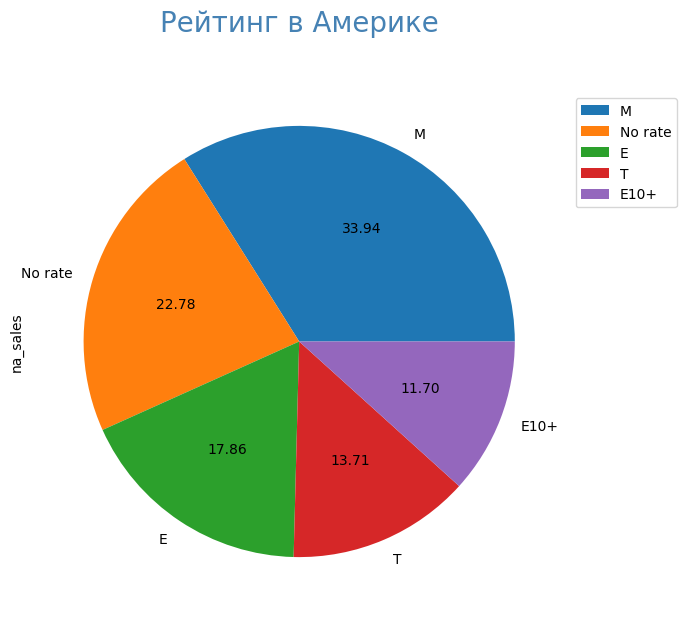

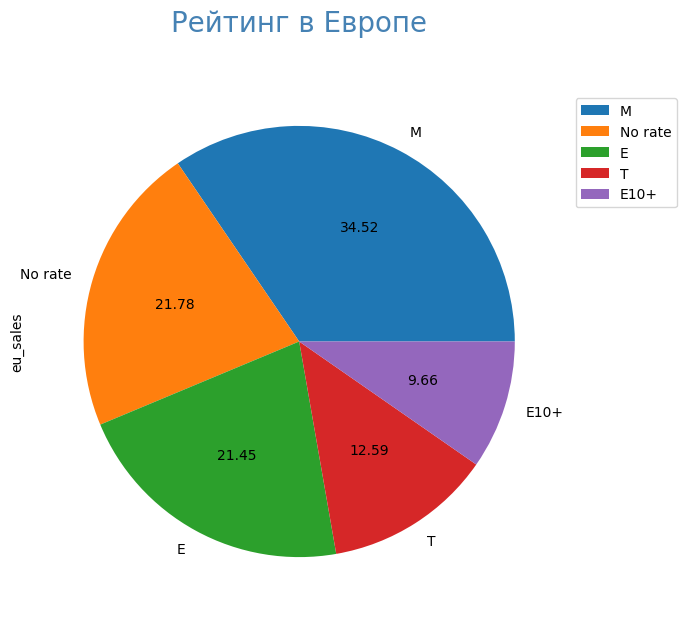

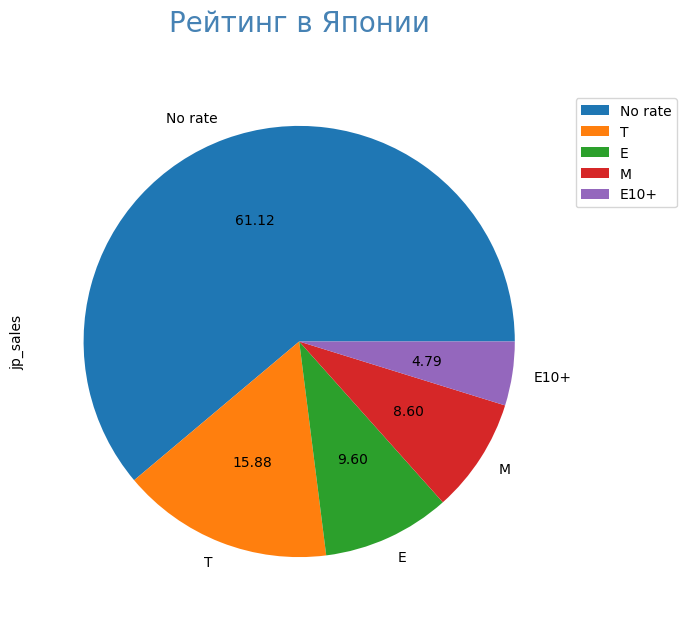

In [66]:
na_rate.head(5).plot.pie(y='na_sales', figsize=(7, 7), autopct="%.2f").set_title('Рейтинг в Америке' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

eu_rate.head(5).plot.pie(y='eu_sales', figsize=(7, 7), autopct="%.2f").set_title('Рейтинг в Европе' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

jp_rate.head(5).plot.pie(y='jp_sales', figsize=(7, 7), autopct="%.2f").set_title('Рейтинг в Японии' + "\n", fontsize = 20, color = 'SteelBlue');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85));

*Вывод по рейтингу.*

Картина в целом одинаковая для всех регионов, рейтинг E(игры для всех) преобладает, оно и понятно, ограничений на продажу таких игр нет.

Далее идет рейтинг T (для подростков) и рейтиг М (для взрослых).

В Европе и Америке больше по душе игры для "взрослых", остальные распределяются примерно в равной степени. К тому же много игр без рейтинга.

В Японии большинство игр не имеют рейтинг ESRB, причина неизвестна, далее идут игры для подростков, и уже потом все остальные. ВОзможно это связано с местной цензурой, ведь игры для взрослых по популярности находятся очень низко.

## Проверка гипотез

### Сравнение рейтингов на платформах xbox и pc
Предположим, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Рейтинг user_score на Xbox  = Рейтинг user_score на PC

H_1: Рейтинг user_score на Xbox  ≠ Рейтинг user_score на PC

alpha = 0.05

Для расчета придется удалить пропуски, иначе метод не будет работать.

In [67]:
xone = df.loc[df['platform']=='XOne']
xone = xone['user_score']
xone = xone.dropna()

In [68]:
pc = df.loc[df['platform']=='PC']
pc = pc['user_score']
pc = pc.dropna()

In [69]:
results = st.ttest_ind(xone, pc, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Значение p-value = 5е-6, это очень маленьке знаение, гораздо меньше альфы.

P-value показывает вероятность ошибки при отвергании гипотезы.

Чем меньше это значение, тем менее вероятна наша нулевая гипотеза, но это значение не говорит нам однозначно что делать.

В данном случае оно на столько маленькое, что какое бы разумное значение альфа мы не взяли - гипотеза была бы отвергнута.

UPD

Вероятность правдивости гипотезы 11%, что достаточно много, считаем что скорее всего рейтинги равны.

### Сравнение рейтингов жанров Action и Sports

Предположим, что Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Рейтинг user_score жанра action  = Рейтинг user_score жанра sports

H_1:  Рейтинг user_score жанра action  ≠ Рейтинг user_score жанра sports

alpha = 0.05

In [70]:
action = df.loc[df['genre']=='Action']
action = action['user_score']
action = action.dropna()

In [71]:
sport = df.loc[df['genre']=='Sports']
sport = sport['user_score']
sport = sport.dropna()

In [72]:
results = st.ttest_ind(action, sport, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Получилась крайне маленькая вероятность, соответсвенно скорее всего рейтинги не равны.

## Вывод

В данном проекте мы провели анализ данным продаж игр для разных платформ в разных регионах.

Было выполнено:

1. Предобработка данных(пропуски, переименовка стобцов, изменение типов данных)
2. Анализ платформ на актуальынй период(2014-16 года) и все время с целью выявить лучшие:
- Топ платформ(20014-16) - PS4, XOne
Далее Японская 3DS и предыдущие версии платформ топов: ps3 и xbox360.

3. Анализ отзывов пользователей и критиков, с целью поиска зависимости продаж от отзывов:
- Сильной зависимости не выявлено
4. Рассмотрели  данные по каждому крупному региону и выявили натболее популярные игровые платформы и жанры.
- Данные в Америке и Европе в целом схожи(платформы серии Sony и Xbox; жанры - action, sport, shooter), а в Японии преобладают другие платформы(серии Nintendo, Sony) и жанры(Roleplay, action).
5. Проверили некоторые гипотезы для платформ и жанров.
- Средние рейтинги пользователей на платформе Xbox скорее всего равны рейтингам пользоватлей на PC
- Срединй рейтинги пользователей жанра action скорее всего не равны рейтингам пользователей жанра sports